In [1]:
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import math


In [6]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data.pkl')
print(df)

           PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0      1.740275 -1.227129 -1.790876  0.161247  0.275050  0.965192  0.435542   
1     -0.698921 -0.339735 -2.599000 -5.010286 -4.463964 -4.013501  4.072452   
2      0.048296 -3.438521 -4.143672  1.146252 -3.860035 -0.222591  1.942955   
3     -3.870754 -0.689113 -0.222956 -2.856002  1.961251 -0.939777  0.577061   
4     -1.727692  0.274263 -3.095587  4.084384  0.156507  0.448027 -0.200198   
...         ...       ...       ...       ...       ...       ...       ...   
44961  0.654349 -3.306278  0.399802  3.959899  1.629976 -0.622740 -0.614307   
44962  0.662808 -0.957646  4.085236  0.848949 -0.810316  0.216555 -1.086523   
44963 -1.160129 -2.110397  6.107604 -0.708618 -1.904028  5.519812 -2.138788   
44964  0.150983 -2.030792  4.695090 -3.753779 -2.317926  2.143655  1.396339   
44965  1.339532 -0.727537  2.431166  1.291172  2.767690  4.109785 -1.991149   

           PCA8      PCA9     PCA10  ...     PCA13 

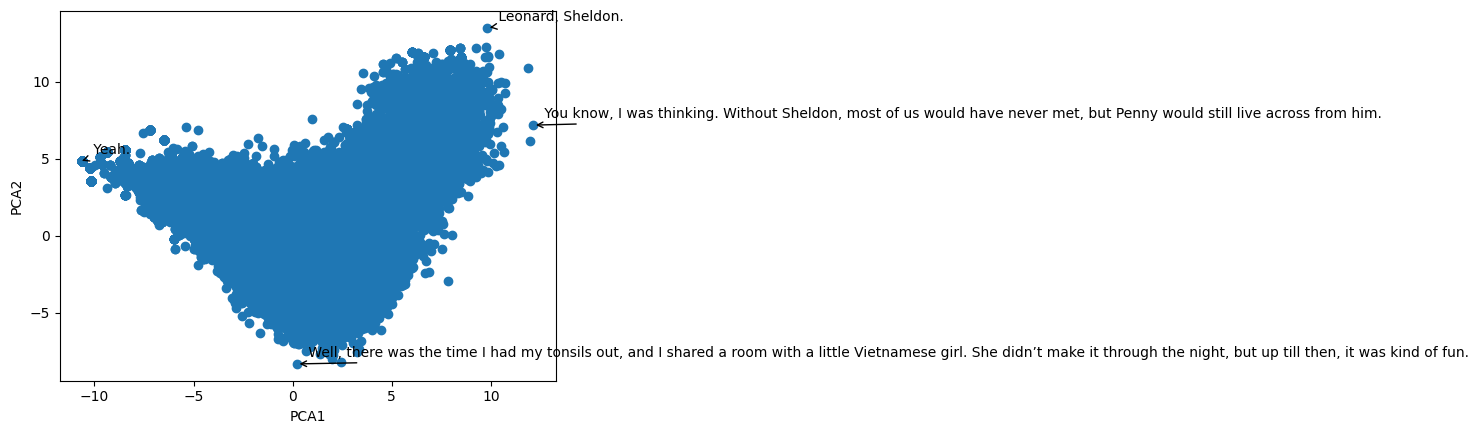

In [8]:
# Plotting PCA1 and PCA2

plt.scatter(pca_df['PCA1'], pca_df['PCA2'])

# Finding the index of the furthest words on each axis
max_pca1_index = pca_df['PCA1'].idxmax()
max_pca2_index = pca_df['PCA2'].idxmax()

min_pca1_index = pca_df['PCA1'].idxmin()
min_pca2_index = pca_df['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = pca_df['Said'][max_pca1_index]
max_pca2_word = pca_df['Said'][max_pca2_index]

min_pca1_word = pca_df['Said'][min_pca1_index]
min_pca2_word = pca_df['Said'][min_pca2_index]

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (pca_df['PCA1'][max_pca1_index], pca_df['PCA2'][max_pca1_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (pca_df['PCA1'][max_pca2_index], pca_df['PCA2'][max_pca2_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (pca_df['PCA1'][min_pca1_index], pca_df['PCA2'][min_pca1_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (pca_df['PCA1'][min_pca2_index], pca_df['PCA2'][min_pca2_index]), xytext=(5, 5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))



# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA1vsPCA2.png')
# Displaying the plot
plt.show()

In [9]:
x= pca_df.nsmallest(2000,'PCA1')
print('nSmaller')
print(x['Said'])
print()
x=pca_df.nlargest(2000,'PCA1')
print('nlargest')
print(x['Said'])

nSmaller
96              Yeah. 
491              Yeah.
581              Yeah.
738              Yeah.
892              Yeah.
             ...      
44157             Bye.
44943             Bye.
1470      That works. 
9545             I am.
25081            I am.
Name: Said, Length: 2000, dtype: object

nlargest
28063     You know, I was thinking. Without Sheldon, mo...
28037     Which couldn’t have happened if you didn’t li...
25910     Oh, my God, Sheldon the genius is jealous of ...
43697     This isn’t about me and Sheldon. This is abou...
30894     Now, I never thought I’d say this, but I’m ki...
                               ...                        
40441     Oh, Leonard’s mad at me, so I’m making him le...
31252     Sheldon and I got an eight-point-two out of ten.
42012     Well, the new network name is ha ha ha, now I...
27522       No, no, honey, if I take it off, Sheldon wins.
39547     Well, Howard eating that pistachio was like w...
Name: Said, Length: 2000, dtype: object

In [10]:
num_clusters = 10

X = pca_df.loc[:,'PCA1':'PCA2'] #select all the PCA

#Initialize the class object

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
# adding a cluster column to the dataset
pca_df['Cluster']= label

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

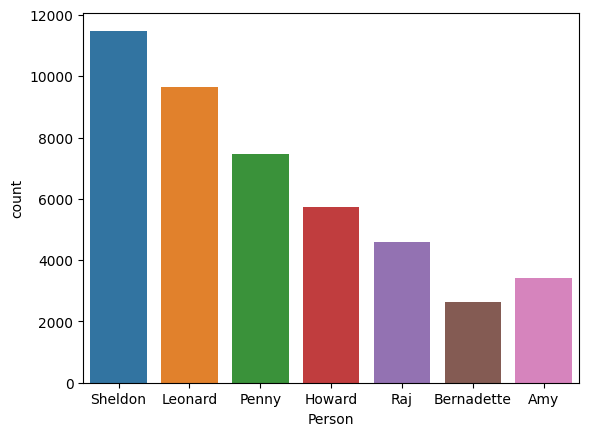

In [11]:
sns.countplot(x='Person', data=pca_df)
plt.savefig('charactercount.png')
plt.show()

In [12]:
from scipy.spatial.distance import euclidean
import random
df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    #print('closest point to cluster center: ', cluster_pts[min_idx])
    #print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    #print('  ', df2[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print('cluster:', iclust)
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])
    print('Random phrases in the cluster:')
    for i in np.arange(20):
        print(pca_df['Said'][cluster_pts_indices[random.randint(cluster_pts_indices[0],len(cluster_pts_indices))]])

cluster: 0
Sheldon :  Sheldon’s log, stardate 63345.3. While my colleagues are off observing the Leonid meteor shower, I have remained behind to complete my paper on the decays of highly excited massive string states. Although my research is going well I do miss the warmth of human companionship. (He laughs)
Random phrases in the cluster:
 He’s right, Penny. It’s all there.
 Oh come on, really? (Leonard whistles)
 Please, Leonard, don’t leer, you have a girlfriend.
 Oh, I heard him interviewed on the radio. You know, when they told him he won, he didn’t believe it, but then he did believe it. It was so funny.
 Hello, Leonard, do you like my bongos? Bet you didn’t know that I had bongos.
 Except for Raj.
 Who’s the bobblehead of?
 No, I believe Leonard is waiting for you to come crawling back to him and apologize.
 Oh, Giselle’s not getting kicked off. It’s totally going to be Summer. (She picks up one of Sheldon’s onion rings. Raj lets out a high pitched squeak and points.) What?
 Nah,

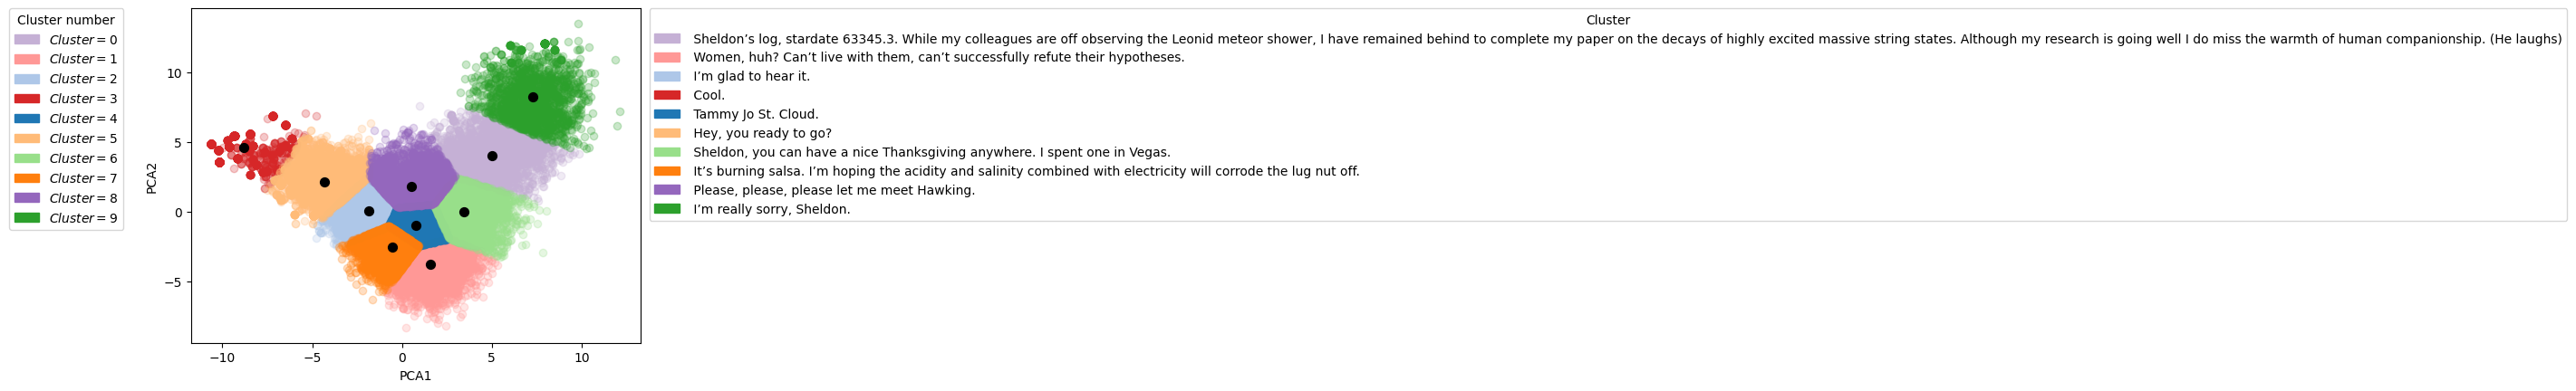


cluster: 0
Random phrases in the cluster:
Leonard :  Hey, you guys let Stuart live with you. Why not Raj, too?
Howard :  I’ll show you one more time. Raj?
Raj :  I’m happy for you, Sheldon. But I have to admit I’m going to miss sharing an office with you.
Penny :  So what’s the thanks I get for turning Leonard into quality boyfriend material? I have to tiptoe around his new girlfriend.
Sheldon :  Were you under the impression that Leonard has no complaints about you?
Penny :  And Zack’s engaged. Leonard has no reason to feel threatened.
Penny :  You are kidding. Raj likes Bernadette?
Sheldon :  I don’t understand why you people are picking on my friend, Howard, when there are much more serious security threats to pursue. For instance, when I first met Leonard, he was on the verge of giving away rocket secrets to a North Korean spy, and not one agent ever investigated that.
Amy :  I know how you feel. Sheldon ignored me for a week when he got that Roomba vacuum. I kick it when he’s not


cluster: 9
Random phrases in the cluster:
Leonard :  Oh, hi, Penny, guess what? Sheldon got bongos.
Penny :  No you don’t. Oh, hey, what’s Sheldon supposed to be.
Raj :  What do you want, Sheldon?
Amy :  Stuart, believe it or not, I understand. You know, before I met Sheldon, I was alone for a really long time. I was so desperate for people to like me, when I met these guys, it took everything in my power to hide my insecurity.
Leonard :  I found another tweet from a student at Sheldon’s lecture. Dr. Cooper has taken a relatively boring subject and managed to make it completely insufferable. Plus, he looks like a giant insect.
Raj :  Good night, Sheldon.
Penny :  Good night, Leonard.
Leonard :  Sheldon? I just dropped him off at the comic book store. Why?
Penny :  Please, Sheldon. I need you.
Bernadette :  That’s lovely, Sheldon.
Sheldon :  Hu-u-urgh! Leonard not jealous.
Penny :  He’s still mad at Leonard, huh?
Raj :  Yeah. Like when you took Sheldon to Texas and showed him all aroun

In [14]:
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]

colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('clusterprediction12.png',bbox_inches='tight')
plt.show()


import random
df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])

    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print('')
    print('cluster:', iclust)
    print('Random phrases in the cluster:')
    for i in np.arange(20):
        ind = random.randint(cluster_pts_indices[0],len(cluster_pts_indices))
        print(pca_df['Person'][cluster_pts_indices[ind]],':',pca_df['Said'][cluster_pts_indices[ind]])
        

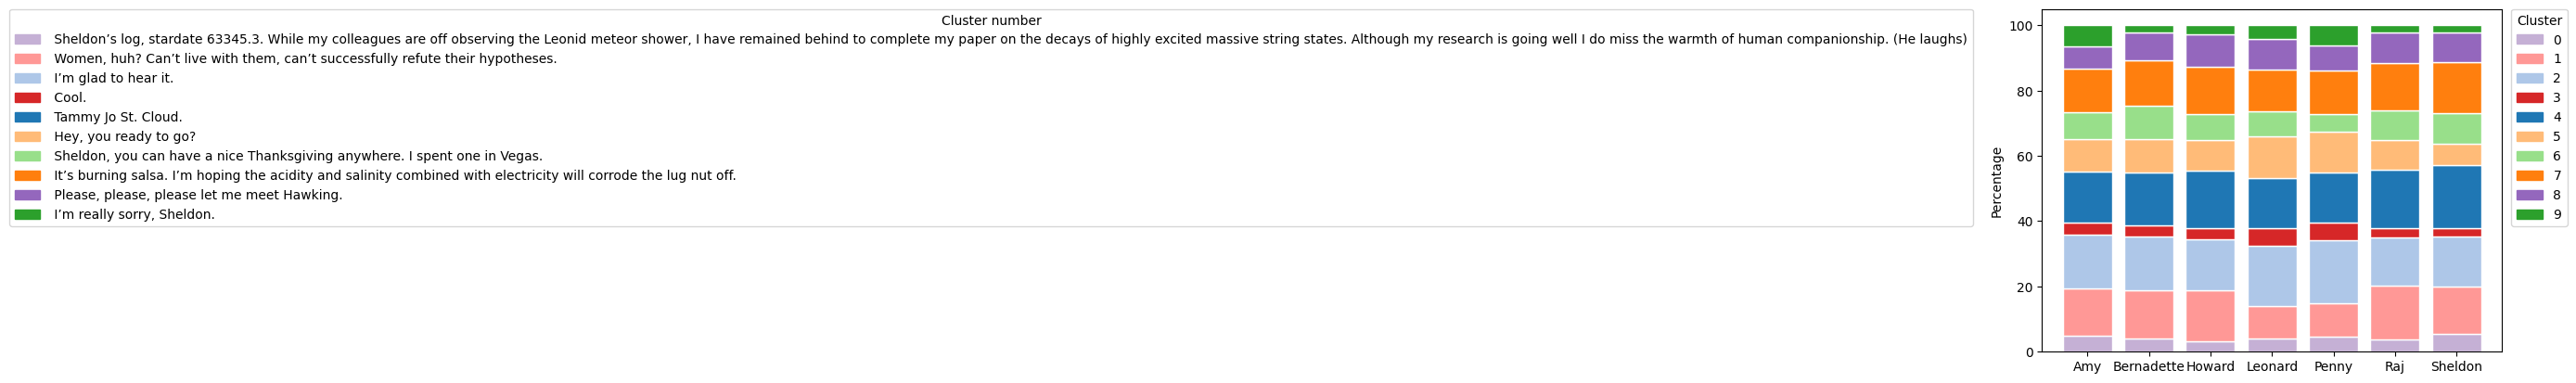

In [15]:
def make_order(num_clusters,percentage):
    array=np.zeros((num_clusters,2))
    
    for i in np.arange(num_clusters):
        array[i][0]=i
    for i in percentage.index:
        array[i][1]=percentage.loc[i]
    return array

text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
name=np.unique(pca_df['Person'])
r= np.arange(len(name))

colors = sns.color_palette('tab20', num_clusters)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

fig = plt.figure()
ax = fig.add_subplot()

for i in name:
    character =pca_df[pca_df['Person'].str.contains(i)]
    percent = character['Cluster'].value_counts(normalize=True) * 100 
    percentage = make_order(num_clusters,percent)
    x = np.zeros(num_clusters)
    b=0
    for cluster_val in np.arange(num_clusters):
        x[cluster_val]=percentage[cluster_val][1]
        plt.bar(i,x[cluster_val],bottom=b, edgecolor='white', color=ind_col_map[cluster_val], label=f'$Cluster = {cluster_val}$')
        b += x[cluster_val]
        


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))
    
first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)
  
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key], label=text[key]))



    # display the graph.
ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.ylabel('Percentage')
plt.savefig('Percentage_allsentences.png',bbox_inches='tight')
plt.show()


<bound method Series.unique of 0        Sheldon
1        Leonard
2        Sheldon
3        Leonard
4        Leonard
          ...   
44961    Sheldon
44962    Sheldon
44963    Sheldon
44964    Sheldon
44965    Sheldon
Name: Person, Length: 44966, dtype: object>

<IPython.core.display.Javascript object>


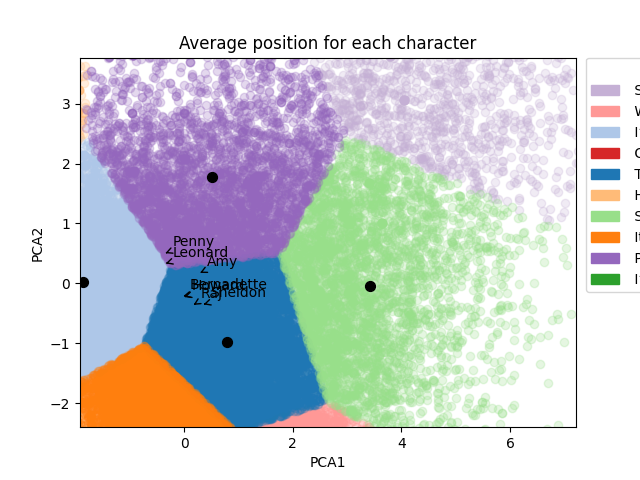

In [18]:
%matplotlib notebook

sheldon =pca_df[pca_df['Person'].str.contains('Sheldon')]
sheldon_mean_pca1_index = sheldon['PCA1'].mean()
sheldon_mean_pca2_index = sheldon['PCA2'].mean()

leonard =pca_df[pca_df['Person'].str.contains('Leonard')]
leonard_mean_pca1_index = leonard['PCA1'].mean()
leonard_mean_pca2_index = leonard['PCA2'].mean()

penny =pca_df[pca_df['Person'].str.contains('Penny')]
penny_mean_pca1_index = penny['PCA1'].mean()
penny_mean_pca2_index = penny['PCA2'].mean()

howard =pca_df[pca_df['Person'].str.contains('Howard')]
howard_mean_pca1_index = howard['PCA1'].mean()
howard_mean_pca2_index = howard['PCA2'].mean()

raj =pca_df[pca_df['Person'].str.contains('Raj')]
raj_mean_pca1_index = raj['PCA1'].mean()
raj_mean_pca2_index = raj['PCA2'].mean()

bernadette =pca_df[pca_df['Person'].str.contains('Bernadette')]
bernadette_mean_pca1_index = bernadette['PCA1'].mean()
bernadette_mean_pca2_index = bernadette['PCA2'].mean()

amy =pca_df[pca_df['Person'].str.contains('Amy')]
amy_mean_pca1_index = amy['PCA1'].mean()
amy_mean_pca2_index = amy['PCA2'].mean()

text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))


df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.2,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)







# Plotting PCA1 and PCA2



# Mean for PCA1

plt.annotate('Sheldon', (sheldon_mean_pca1_index,sheldon_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Leonard', (leonard_mean_pca1_index, leonard_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Penny', (penny_mean_pca1_index, penny_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Howard', (howard_mean_pca1_index ,howard_mean_pca2_index ), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Raj', (raj_mean_pca1_index,raj_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Bernadette', (bernadette_mean_pca1_index, bernadette_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.annotate('Amy', (amy_mean_pca1_index, amy_mean_pca2_index), xytext=(5,5),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Average position for each character')
plt.savefig('average position.png',bbox_inches='tight')

# Displaying the plot
plt.show()